In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
file_path = '/content/drive/MyDrive/linear_regression_model/DatasetAfricaMalaria.csv'
df = pd.read_csv(file_path)

df.head(5)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Country Name,Year,Country Code,"Incidence of malaria (per 1,000 population at risk)",Malaria cases reported,Use of insecticide-treated bed nets (% of under-5 population),Children with fever receiving antimalarial drugs (% of children under age 5 with fever),Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women),People using safely managed drinking water services (% of population),"People using safely managed drinking water services, rural (% of rural population)",...,Urban population growth (annual %),People using at least basic drinking water services (% of population),"People using at least basic drinking water services, rural (% of rural population)","People using at least basic drinking water services, urban (% of urban population)",People using at least basic sanitation services (% of population),"People using at least basic sanitation services, rural (% of rural population)","People using at least basic sanitation services, urban (% of urban population)",latitude,longitude,geometry
0,Algeria,2007,DZA,0.01,26.0,NaN,NaN,NaN,NaN,NaN,...,2.71,91.68,85.83,94.78,85.85,76.94,90.57,28.033886,1.659626,POINT (28.033886 1.659626)
1,Angola,2007,AGO,286.72,1533485.0,18.0,29.8,1.5,NaN,NaN,...,5.01,47.96,23.77,65.83,37.26,14.00,54.44,-11.202692,17.873887,POINT (-11.202692 17.873887)
2,Benin,2007,BEN,480.24,0.0,NaN,NaN,NaN,NaN,NaN,...,4.09,63.78,54.92,76.24,11.80,4.29,22.36,9.307690,2.315834,POINT (9.307689999999999 2.315834)
3,Botswana,2007,BWA,1.03,390.0,NaN,NaN,NaN,NaN,NaN,...,4.80,78.89,57.60,94.35,61.60,39.99,77.30,-22.328474,24.684866,POINT (-22.328474 24.684866)
4,Burkina Faso,2007,BFA,503.80,44246.0,NaN,NaN,NaN,NaN,NaN,...,5.91,52.27,45.13,76.15,15.60,6.38,46.49,12.238333,-1.561593,POINT (12.238333 -1.561593)


Incidence of malaria (per 1,000 population at risk)

In [2]:
df = df.drop(columns=['Country Name', 'Country Code', 'Year', 'latitude', 'longitude', 'geometry'])

# Fill missing with median
df.fillna(df.median(numeric_only=True), inplace=True)


In [3]:
df.head()

,"Incidence of malaria (per 1,000 population at risk)",Malaria cases reported,Use of insecticide-treated bed nets (% of under-5 population),Children with fever receiving antimalarial drugs (% of children under age 5 with fever),Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women),People using safely managed drinking water services (% of population),"People using safely managed drinking water services, rural (% of rural population)","People using safely managed drinking water services, urban (% of urban population)",People using safely managed sanitation services (% of population),"People using safely managed sanitation services, rural (% of rural population)",...,Rural population (% of total population),Rural population growth (annual %),Urban population (% of total population),Urban population growth (annual %),People using at least basic drinking water services (% of population),"People using at least basic drinking water services, rural (% of rural population)","People using at least basic drinking water services, urban (% of urban population)",People using at least basic sanitation services (% of population),"People using at least basic sanitation services, rural (% of rural population)","People using at least basic sanitation services, urban (% of urban population)"
0,0.01,26.0,42.9,29.3,11.5,28.39,10.675,51.365,18.24,19.96,...,34.65,-0.60,65.35,2.71,91.68,85.83,94.78,85.85,76.94,90.57
1,286.72,1533485.0,18.0,29.8,1.5,28.39,10.675,51.365,25.41,15.95,...,42.48,1.91,57.52,5.01,47.96,23.77,65.83,37.26,14.00,54.44
2,480.24,0.0,42.9,29.3,11.5,28.39,10.675,51.365,25.41,15.95,...,58.44,1.99,41.56,4.09,63.78,54.92,76.24,11.80,4.29,22.36
3,1.03,390.0,42.9,29.3,11.5,28.39,10.675,83.960,25.41,15.95,...,42.07,-1.44,57.93,4.80,78.89,57.60,94.35,61.60,39.99,77.30
4,503.80,44246.0,42.9,29.3,11.5,28.39,10.675,51.365,25.41,15.95,...,77.00,2.16,23.00,5.91,52.27,45.13,76.15,15.60,6.38,46.49


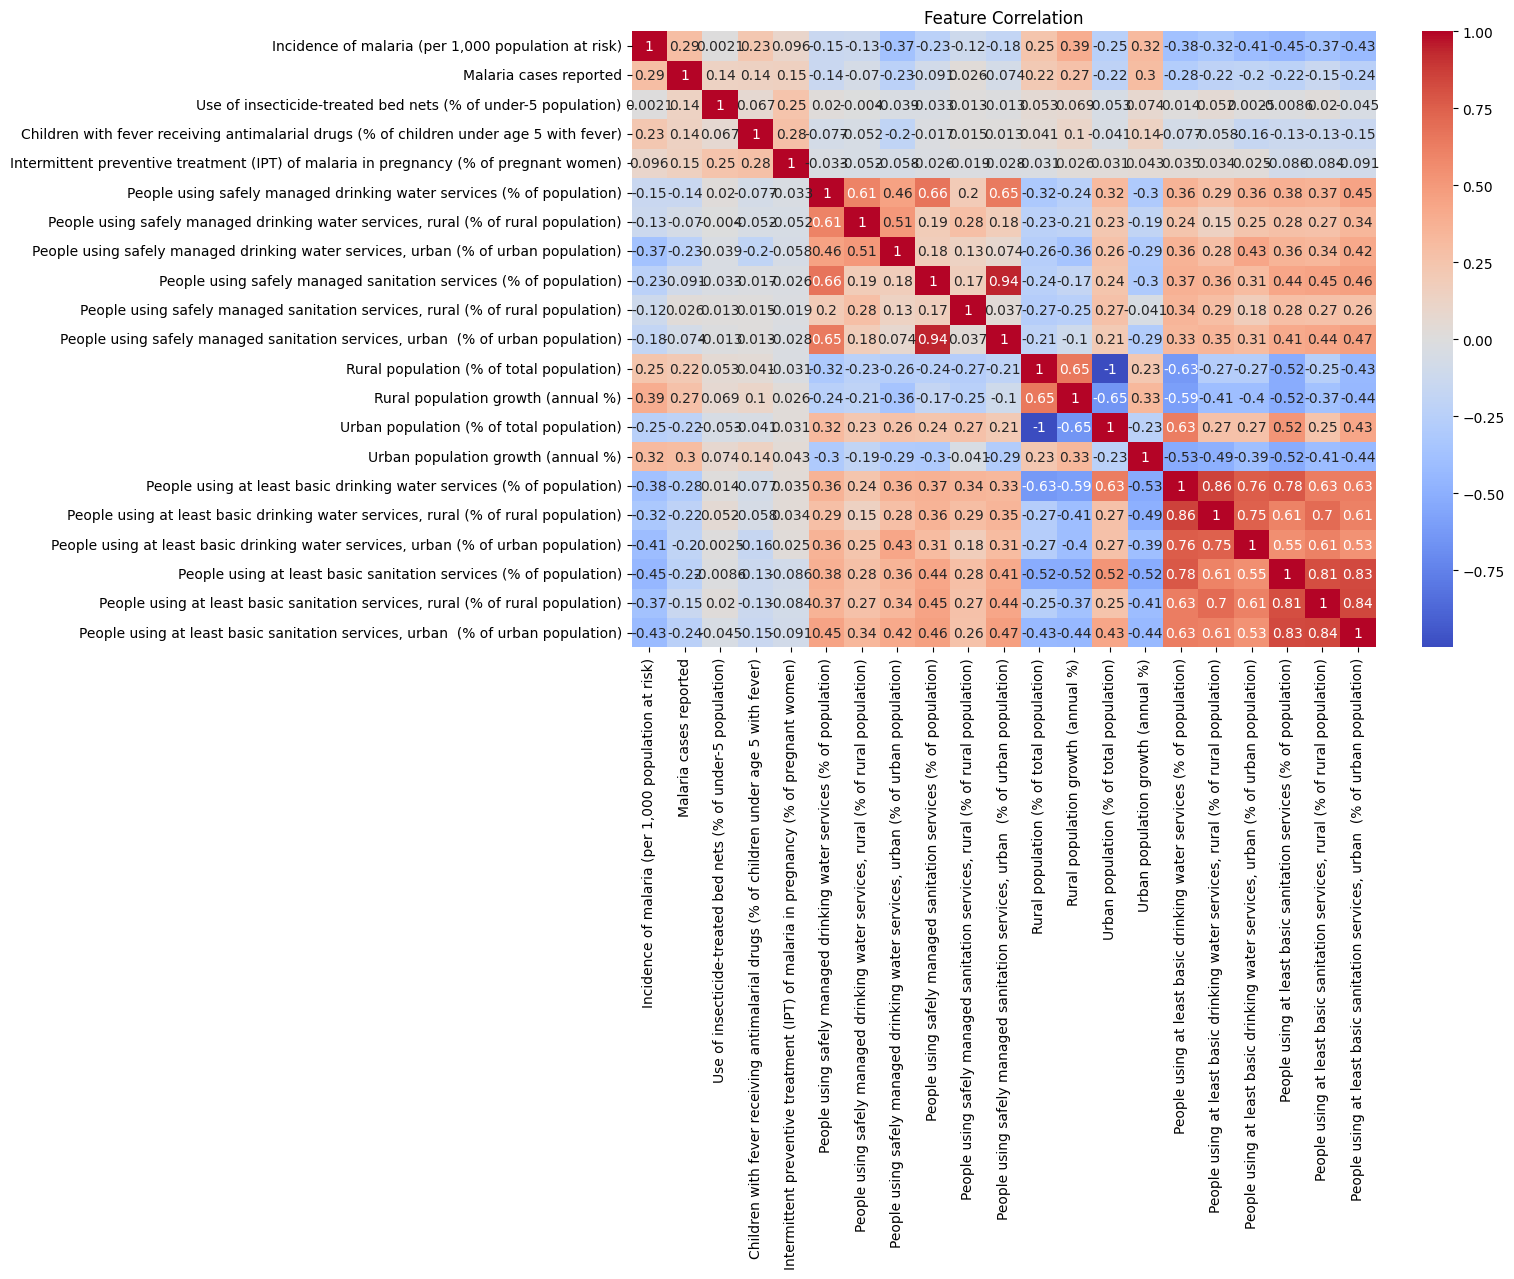

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

Based on the correlation values and their relevance to the target variable (malaria incidence), the following features were selected due to their strong relationships:

- Urban population growth (annual %).(+0.39)

- Rural population growth (annual %).(+0.39)

- Urban population (% of total population).(-0.25)

- People using at least basic sanitation services (% of population).(-0.45)

- People using at least basic drinking water services, urban (% of urban population).(-0.41)

In addition to these, several domain-specific health indicators were kept, even if their correlations were weaker, because of their direct relevance to malaria control and prevention:

- Use of insecticide-treated bed nets (% of under-5 population)

- Children with fever receiving antimalarial drugs (% of children under age 5 with fever)

- Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)

These health-related features are closely tied to malaria prevention and treatment practices and may provide important context even if their direct correlation is limited. Their inclusion is justified through domain knowledge rather than pure correlation strength.

In [19]:
selected_features = [
    'Use of insecticide-treated bed nets (% of under-5 population)',
    'Children with fever receiving antimalarial drugs (% of children under age 5 with fever)',
    'Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)',
    'Urban population growth (annual %)',
    'Rural population growth (annual %)',
    'Urban population (% of total population)',
    'People using at least basic sanitation services (% of population)',
    'People using at least basic drinking water services, urban (% of urban population)'
]

target_variable = 'Incidence of malaria (per 1,000 population at risk)'

filtered_df = df[selected_features + [target_variable]].dropna()


In [20]:
from sklearn.preprocessing import StandardScaler

# Define target and features
target = 'Incidence of malaria (per 1,000 population at risk)'

X = df[selected_features]
y = df[target]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=selected_features)

X_scaled_df.head()


,Use of insecticide-treated bed nets (% of under-5 population),Children with fever receiving antimalarial drugs (% of children under age 5 with fever),Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women),Urban population growth (annual %),Rural population growth (annual %),Urban population (% of total population),People using at least basic sanitation services (% of population),"People using at least basic drinking water services, urban (% of urban population)"
0,0.008678,-0.021686,-0.116559,-0.563033,-1.670031,1.234825,1.775707,1.151610
1,-2.621424,0.036866,-1.975353,1.025600,0.434005,0.799340,-0.081807,-2.036532
2,0.008678,-0.021686,-0.116559,0.390146,0.501066,-0.088316,-1.055100,-0.890122
3,0.008678,-0.021686,-0.116559,0.880551,-2.374171,0.822143,0.848671,1.104256
4,0.008678,-0.021686,-0.116559,1.647239,0.643570,-1.120577,-0.909832,-0.900034


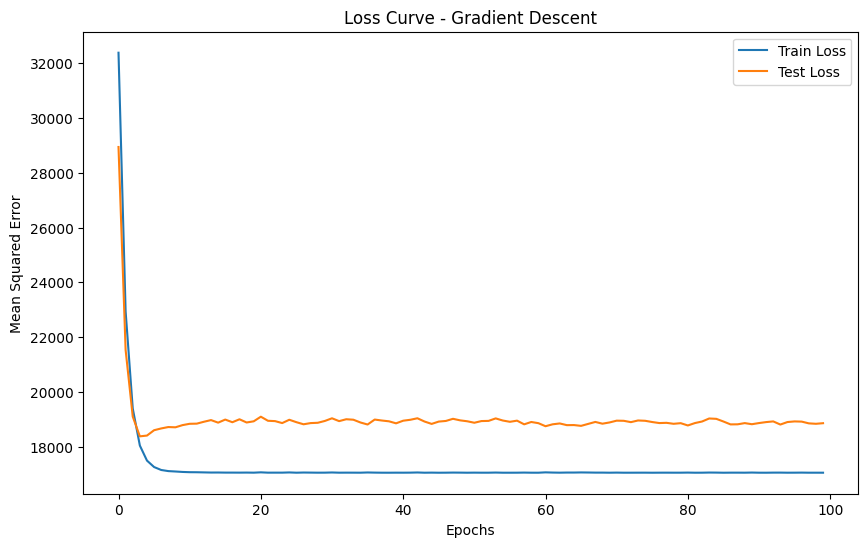

In [21]:
import warnings
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.exceptions import ConvergenceWarning

# Suppress only ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize model
sgd = SGDRegressor(max_iter=1, learning_rate='constant', eta0=0.001, warm_start=True)

n_epochs = 100
train_loss = []
test_loss = []

for epoch in range(n_epochs):
    sgd.fit(X_train, y_train)  # continue fitting
    train_pred = sgd.predict(X_train)
    test_pred = sgd.predict(X_test)

    train_loss.append(mean_squared_error(y_train, train_pred))
    test_loss.append(mean_squared_error(y_test, test_pred))

# Plot loss curves
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Train Loss')
plt.plot(test_loss, label='Test Loss')
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.title("Loss Curve - Gradient Descent")
plt.legend()
plt.show()


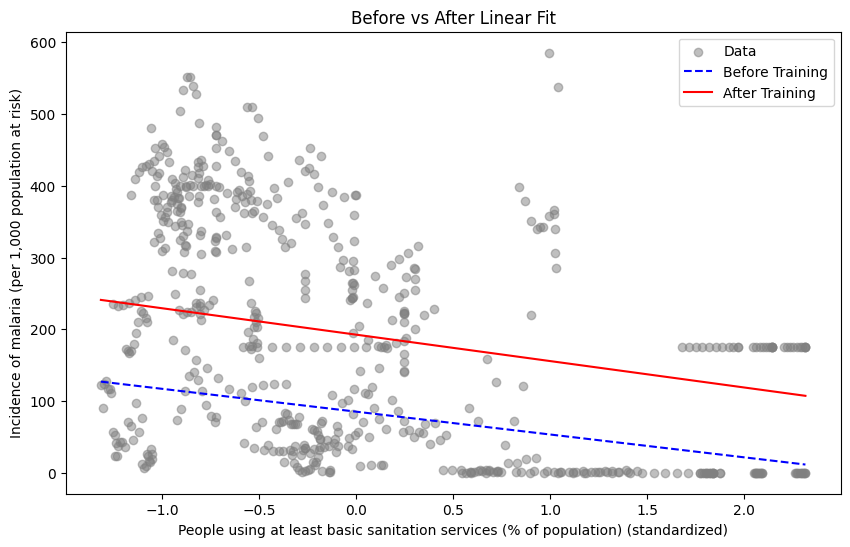

In [22]:
import numpy as np

feature_name = 'People using at least basic sanitation services (% of population)'
feature_index = selected_features.index(feature_name)

# Extract that single feature
X_feature_raw = df[feature_name].values.reshape(-1, 1)
X_feature_scaled = X_scaled[:, feature_index].reshape(-1, 1)

# Get corresponding target
y_values = df[target].values

# Create a new SGDRegressor to simulate "before training"
sgd_before = SGDRegressor(max_iter=1, learning_rate='constant', eta0=0.001, warm_start=True)
sgd_before.fit(X_feature_scaled, y_values)  #

# Train one more time to simulate untrained weights
coef_before = sgd_before.coef_[0]
intercept_before = sgd_before.intercept_[0]

# After training (from your trained model)
coef_after = sgd.coef_[feature_index]
intercept_after = sgd.intercept_[0]

# Sort values for smooth lines
sorted_idx = np.argsort(X_feature_scaled.flatten())
X_sorted = X_feature_scaled.flatten()[sorted_idx]
y_sorted = y_values[sorted_idx]

# Predictions (lines)
y_pred_before = coef_before * X_sorted + intercept_before
y_pred_after = coef_after * X_sorted + intercept_after

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X_feature_scaled, y_values, color='gray', alpha=0.5, label='Data')
plt.plot(X_sorted, y_pred_before, color='blue', linestyle='--', label='Before Training')
plt.plot(X_sorted, y_pred_after, color='red', label='After Training')
plt.xlabel(f"{feature_name} (standardized)")
plt.ylabel("Incidence of malaria (per 1,000 population at risk)")
plt.title("Before vs After Linear Fit")
plt.legend()
plt.show()


# **Random Forest Model**



Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Train MSE: 558.3331159351293
Test MSE: 4675.00211505158
Train R²: 0.9778226365424457
Test R²: 0.7883168522090631


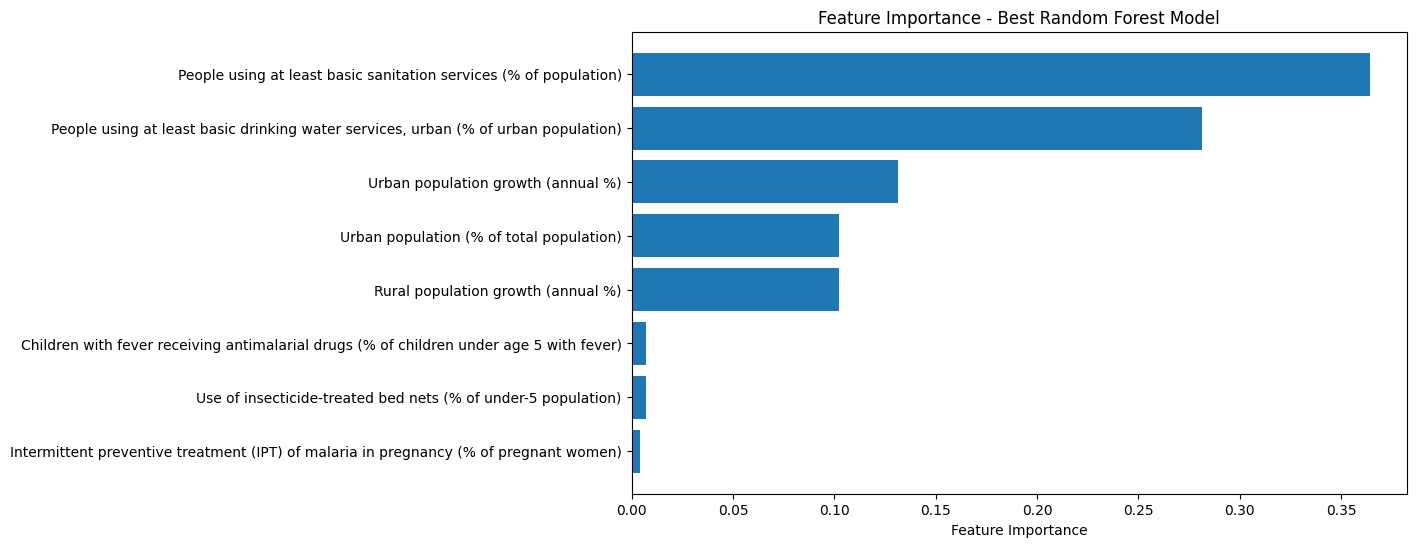

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Prepare data
X = df[selected_features]  # Features
y = df[target]  # Target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

# Initialize GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(RandomForestRegressor(random_state=42),
                           param_grid, cv=5, scoring='r2'
                        )

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Predict using the best model
train_pred = best_model.predict(X_train)
test_pred = best_model.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)

# Print performance metrics
print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Train R²: {train_r2}")
print(f"Test R²: {test_r2}")

# Plot feature importance from the best model
feature_importances = best_model.feature_importances_
sorted_idx = feature_importances.argsort()

plt.figure(figsize=(10, 6))
plt.barh(X.columns[sorted_idx], feature_importances[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance - Best Random Forest Model')
plt.show()


# **Decision Trees Model**

Train MSE: 7861.586011972955
Test MSE: 12193.481019036655
Train R²: 0.6877325643700379
Test R²: 0.44788165200429175


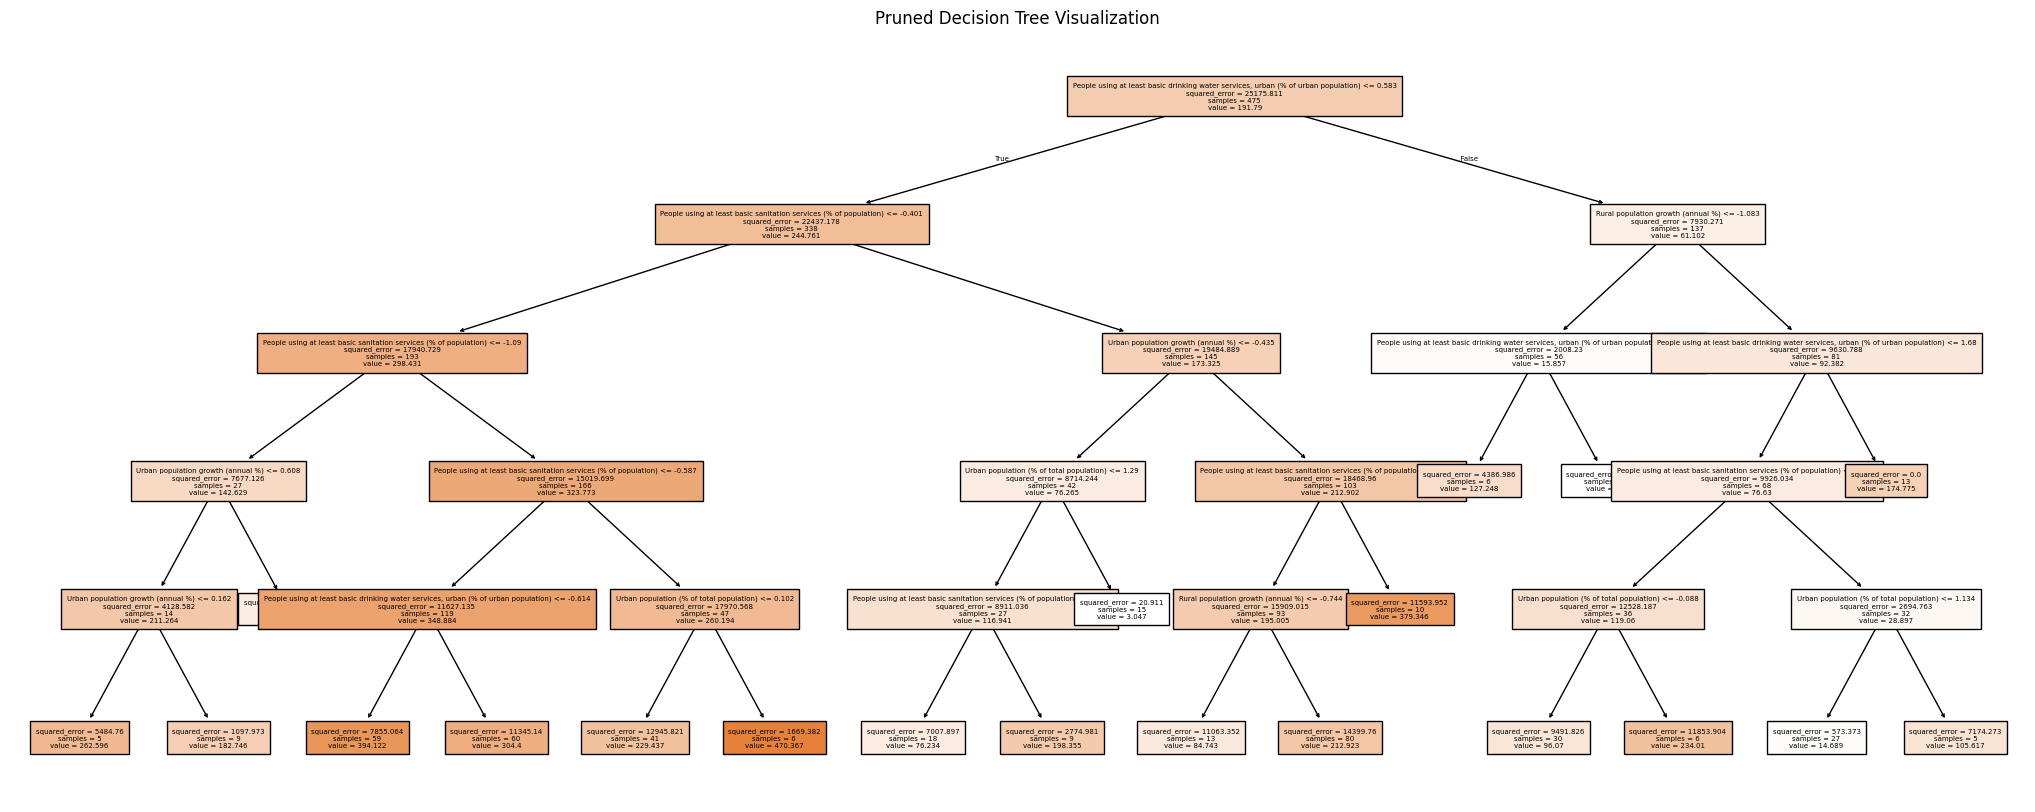

In [24]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Prepare data
X = df[selected_features]  # Features
y = df[target]  # Target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree model with pruning
dt_model = DecisionTreeRegressor(
    random_state=42,
    max_depth=5,               # Limit the depth of the tree
    min_samples_split=10,      # Require at least 10 samples to split a node
    min_samples_leaf=5,
    max_leaf_nodes=20
)

# Train the model
dt_model.fit(X_train, y_train)

# Predict on train and test data
train_pred = dt_model.predict(X_train)
test_pred = dt_model.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)

# Print performance metrics
print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Train R²: {train_r2}")
print(f"Test R²: {test_r2}")

# Plot the decision tree with adjusted size for better visibility of all nodes
plt.figure(figsize=(26, 10))
plot_tree(dt_model, filled=True, feature_names=X.columns, fontsize=5, max_depth=5)
plt.title("Pruned Decision Tree Visualization")
plt.show()



# **Model Comparison**

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)
dt_model = DecisionTreeRegressor(random_state=42)

# Train Linear Regression model
lr_model.fit(X_train, y_train)
lr_train_pred = lr_model.predict(X_train)
lr_test_pred = lr_model.predict(X_test)

# Train Random Forest model
rf_model.fit(X_train, y_train)
rf_train_pred = rf_model.predict(X_train)
rf_test_pred = rf_model.predict(X_test)

# Train Decision Tree model
dt_model.fit(X_train, y_train)
dt_train_pred = dt_model.predict(X_train)
dt_test_pred = dt_model.predict(X_test)

# Calculate MSE and R² for all models
def calculate_metrics(y_train, y_test, train_pred, test_pred):
    train_mse = mean_squared_error(y_train, train_pred)
    test_mse = mean_squared_error(y_test, test_pred)
    train_r2 = r2_score(y_train, train_pred)
    test_r2 = r2_score(y_test, test_pred)
    return train_mse, test_mse, train_r2, test_r2

# Evaluate all models
lr_train_mse, lr_test_mse, lr_train_r2, lr_test_r2 = calculate_metrics(y_train, y_test, lr_train_pred, lr_test_pred)
rf_train_mse, rf_test_mse, rf_train_r2, rf_test_r2 = calculate_metrics(y_train, y_test, rf_train_pred, rf_test_pred)
dt_train_mse, dt_test_mse, dt_train_r2, dt_test_r2 = calculate_metrics(y_train, y_test, dt_train_pred, dt_test_pred)

# Print results for comparison
print("Linear Regression:")
print(f"Train MSE: {lr_train_mse}, Test MSE: {lr_test_mse}")
print(f"Train R²: {lr_train_r2}, Test R²: {lr_test_r2}")
print("\nRandom Forest:")
print(f"Train MSE: {rf_train_mse}, Test MSE: {rf_test_mse}")
print(f"Train R²: {rf_train_r2}, Test R²: {rf_test_r2}")
print("\nDecision Tree:")
print(f"Train MSE: {dt_train_mse}, Test MSE: {dt_test_mse}")
print(f"Train R²: {dt_train_r2}, Test R²: {dt_test_r2}")


Linear Regression:
Train MSE: 17053.279494862523, Test MSE: 18906.08408105234
Train R²: 0.3226323735653793, Test R²: 0.14393634651155085

Random Forest:
Train MSE: 590.401978652294, Test MSE: 4791.764488210678
Train R²: 0.9765488399435143, Test R²: 0.7830298756290354

Decision Tree:
Train MSE: 8.673151981949921e-29, Test MSE: 8672.169167436978
Train R²: 1.0, Test R²: 0.6073259386069146


In [26]:
import joblib
joblib.dump(rf_model, 'incidence_of_malaria_per_1000_people.pkl')
joblib.dump(scaler, 'feature_scaler.pkl')

['feature_scaler.pkl']

In [28]:
# Step 2: Download the files to your computer (if using Google Colab)
from google.colab import files

files.download('incidence_of_malaria_per_1000_people.pkl')
files.download('feature_scaler.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>